In [1]:
import numpy as np
def create_M(n, threshold=0.6):
    random_matrix = np.random.rand(n, n)
    M = (random_matrix < threshold).astype(float)
    return M
n = 50
M = create_M(n)
print(M)
M.shape

[[1. 0. 1. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [1. 1. 0. ... 0. 1. 1.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


(50, 50)

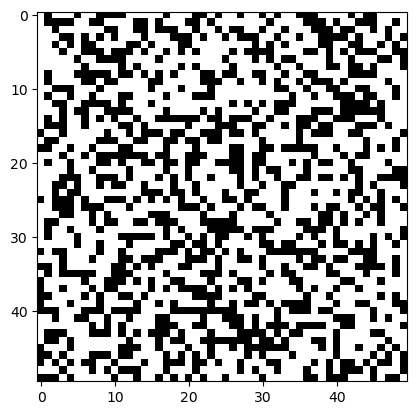

In [2]:
import matplotlib.pyplot as plt
plt.imshow(M, cmap = "gray")

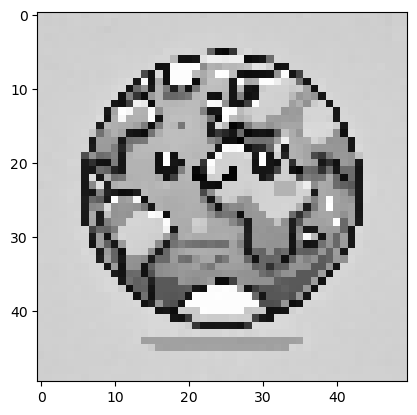

In [3]:
import cv2
from PIL import Image
import numpy as np
img = Image.open("earth.jpeg").convert('L')
im_array = np.array(img)
 # New size as (width, height)
    # Resize the image
new_width = 50  # New width in pixels
new_height = 50  # New height in pixels
resized_image = cv2.resize(im_array, (new_width, new_height))
plt.imshow(resized_image)
plt.imshow(resized_image, cmap = "gray")


In [4]:
import numpy as np

def CG(Y, M, G, lam, epsilon):

    g0 = M * Y + lam * apply_qr(Y) - G
    D = -g0
    itr = 0
    G_norm = np.linalg.norm(G)

    if G_norm == 0:
        return Y, itr

    while (np.linalg.norm(g0) / G_norm) > epsilon:
        Qd = M * D + lam * apply_qr(D)
        alpha = np.sum(g0 * g0) / np.sum(D * Qd)
        Y = Y + alpha * D
        g_new = g0 + alpha * Qd
        beta = np.sum(g_new * g_new) / np.sum(g0 * g0)
        D = -g_new + beta * D
        g0 = g_new
        itr += 1
    return Y, itr

def apply_qr(Y):

    R = np.zeros_like(Y)


    temp = -2 * Y + np.roll(Y, 1, axis=0) + np.roll(Y, -1, axis=0)
    R += -2 * temp + np.roll(temp, 1, axis=0) + np.roll(temp, -1, axis=0)


    temp = -2 * Y + np.roll(Y, 1, axis=1) + np.roll(Y, -1, axis=1)
    R += -2 * temp + np.roll(temp, 1, axis=1) + np.roll(temp, -1, axis=1)


    temp = Y \
           + np.roll(np.roll(Y, 1, axis=0), 1, axis=1) \
           - np.roll(Y, 1, axis=0) - np.roll(Y, 1, axis=1)
    R += temp \
         + np.roll(np.roll(temp, -1, axis=0), -1, axis=1) \
         - np.roll(temp, -1, axis=0) - np.roll(temp, -1, axis=1)

    return R
G = np.multiply(M, resized_image)
Y = np.zeros_like(G)

a,b = CG(Y, M, G, 0.0005,0.000000001)
#plt.imshow(a, cmap = 'gray')
print(b)

68


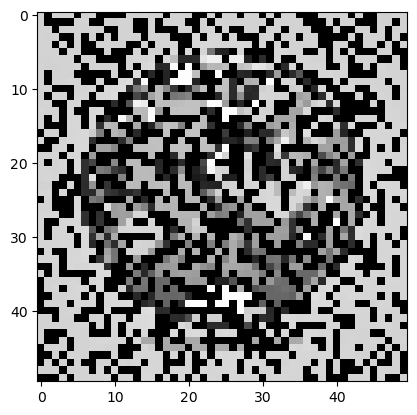

In [5]:
plt.imshow(G, cmap = "gray")

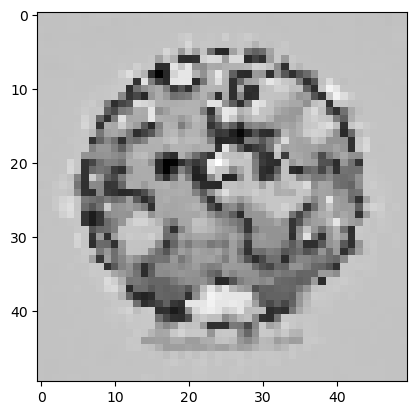

In [7]:
plt.imshow(a, cmap = "gray")

In [6]:
# 

[3292859.280974482, 2164752.1224746173, 2142511.2773615173, 2139765.8536566873, 2139841.798256693]


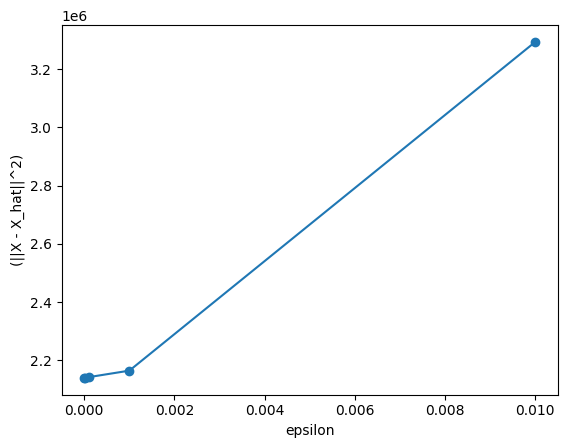

In [7]:
epsilon_v= [0.01, 0.001, 0.0001,0.00001, 0.000001]
X_hat_difference = []
X = resized_image
for epsilon in epsilon_v:
   X_hat,_ = CG(Y, M, G, 0.005, epsilon)
   X_hat_difference.append(np.linalg.norm(X - X_hat)**2)
print(X_hat_difference)

plt.plot(epsilon_v, X_hat_difference, marker='o')
plt.xlabel('epsilon')
plt.ylabel('(||X - X_hat||^2)')
plt.show()

In [8]:
#### QUESTION 3

In [9]:
print(X_hat_difference)

[3292859.280974482, 2164752.1224746173, 2142511.2773615173, 2139765.8536566873, 2139841.798256693]


In [10]:
# optimal epsilon corresponds to the minimum value of (||X - X_hat||^2)
# epsilon = 0.0001

[2313052.2040761737, 2142511.2773615173, 2207592.2955194702, 3519755.153896147]


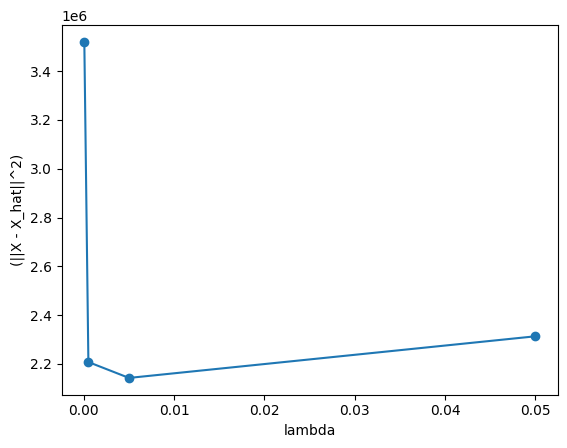

In [50]:
lambda_v= [0.05, 0.005,0.0005, 0.00005]
X_hat_difference = []
X = resized_image
for lambda_ in lambda_v:
   X_hat,_ = CG(Y, M, G, lambda_ , 0.0001)
   X_hat_difference.append(np.linalg.norm(X - X_hat)**2)
print(X_hat_difference)

plt.plot(lambda_v , X_hat_difference, marker='o')
plt.ylabel('(||X - X_hat||^2)')
plt.xlabel('lambda')
plt.show()


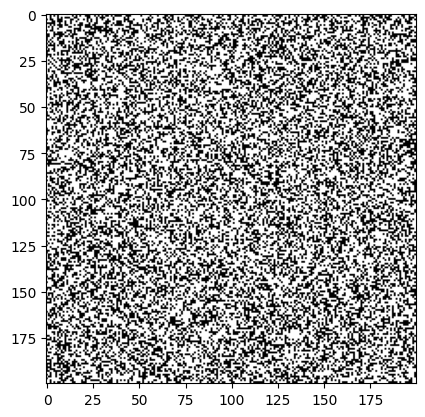

In [12]:
# QUESTION 4

import numpy as np

def create_M1(n, threshold=0.6):
    # Generate an n x n matrix with random values between 0 and 1
    random_matrix = np.random.rand(n, n)

    # Create binary matrix M, setting elements to 1 where random values are below threshold
    M1 = (random_matrix < threshold).astype(float)

    return M1

# Example usage
n = 200  # Dimension of the matrix
M1 = create_M1(n)
#print(M1)
M1.shape
plt.imshow(M1, cmap = "gray")

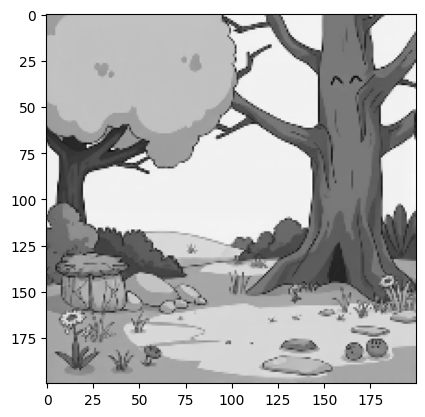

In [13]:
from PIL import Image
import numpy as np

img1 = Image.open("512.jpg").convert('L')
im_array1 = np.array(img1)

new_width = 200
new_height = 200
resized_image1 = cv2.resize(im_array1, (new_width, new_height))
plt.imshow(resized_image1)
plt.imshow(resized_image1, cmap = "gray")

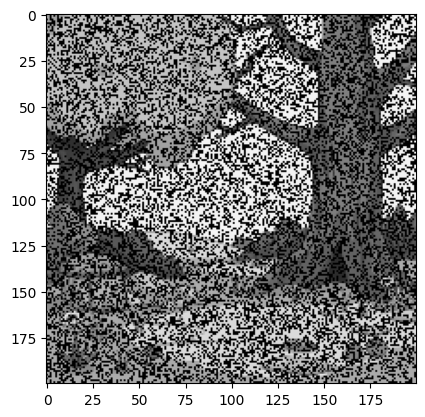

In [14]:
G1 = np.multiply(resized_image1, M1)
plt.imshow(G1, cmap = "gray")

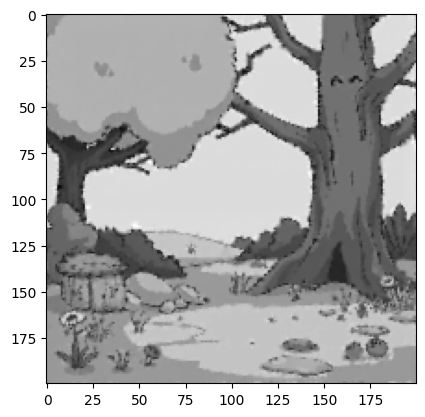

In [49]:
Y1 = np.zeros_like(G1)

a,b = CG(Y1, M1, G1, 0.006,0.0000000001)
plt.imshow(a, cmap = 'gray')

[22506782.873170473, 7728456.741092866, 7089327.431176947, 7074174.945336265, 7075930.842070273]


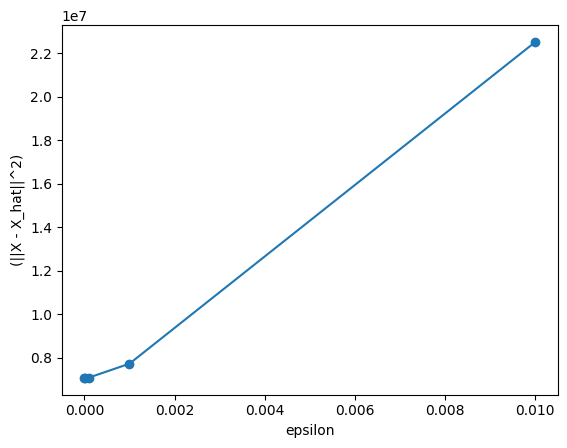

In [48]:
epsilon_v= [0.01, 0.001, 0.0001,0.00001, 0.000001]
X_hat_difference1 = []
X = resized_image1
for epsilon in epsilon_v:
   X_hat,_ = CG(Y1, M1, G1, 0.006, epsilon)
   X_hat_difference1.append(np.linalg.norm(X - X_hat)**2)
print(X_hat_difference1)

plt.plot(epsilon_v, X_hat_difference1, marker='o')
plt.xlabel('epsilon')
plt.ylabel('(||X - X_hat||^2)')
plt.show()

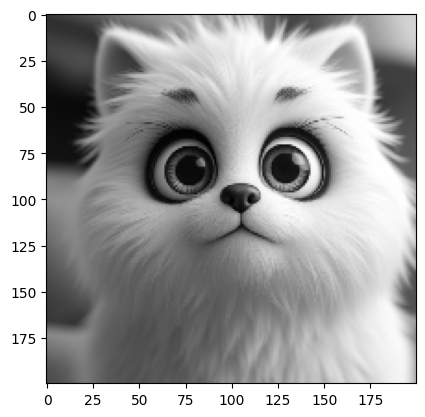

In [17]:
from PIL import Image
import numpy as np

img2 = Image.open("2.jpg").convert('L')
im_array2 = np.array(img2)

new_width = 200
new_height = 200
resized_image2 = cv2.resize(im_array2, (new_width, new_height))
plt.imshow(resized_image2)
plt.imshow(resized_image2, cmap = "gray")

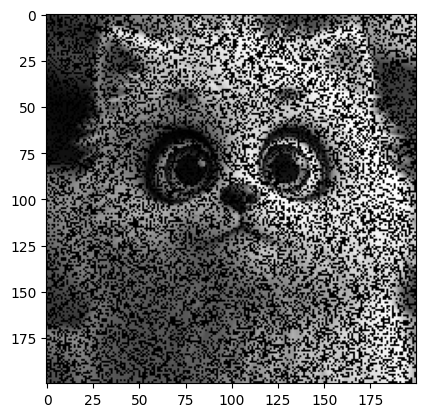

In [18]:
G2 = np.multiply(resized_image2, M1)
plt.imshow(G2, cmap = "gray")

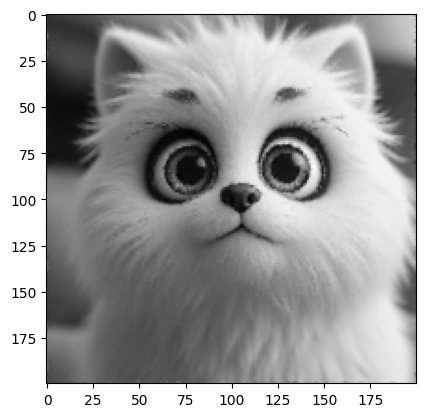

In [46]:
Y2 = np.zeros_like(G2)

a,b = CG(Y2, M1, G2, 0.006,0.0000000001)
plt.imshow(a, cmap = 'gray')

[13776478.997400213, 1466365.6552215419, 1024583.4205921832, 1023239.6347623786, 1023547.7799044522]


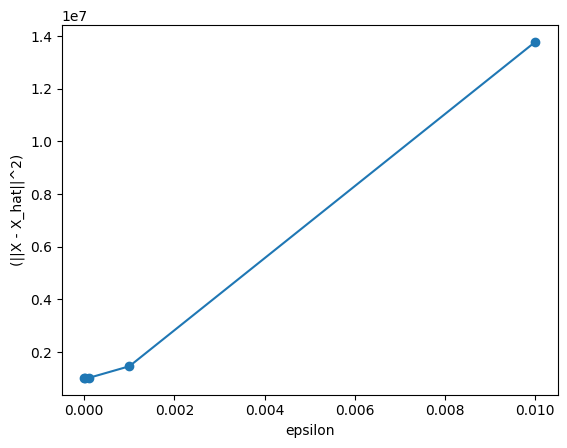

In [47]:
epsilon_v= [0.01, 0.001, 0.0001,0.00001, 0.000001]
X_hat_difference2 = []
X = resized_image2
for epsilon in epsilon_v:
   X_hat,_ = CG(Y2, M1, G2, 0.006, epsilon)
   X_hat_difference2.append(np.linalg.norm(X - X_hat)**2)
print(X_hat_difference2)

plt.plot(epsilon_v, X_hat_difference2, marker='o')
plt.xlabel('epsilon')
plt.ylabel('(||X - X_hat||^2)')
plt.show()

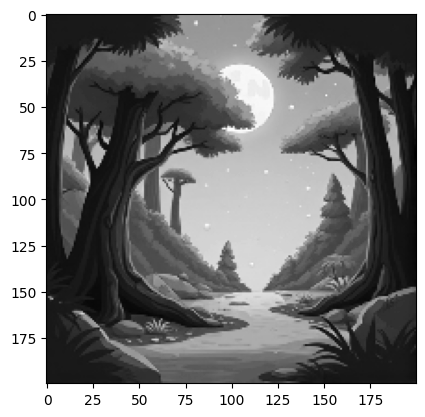

In [21]:
from PIL import Image
import numpy as np

img3 = Image.open("Unknown.jpg").convert('L')
im_array3 = np.array(img3)

new_width = 200
new_height = 200
resized_image3 = cv2.resize(im_array3, (new_width, new_height))
plt.imshow(resized_image3)
plt.imshow(resized_image3, cmap = "gray")

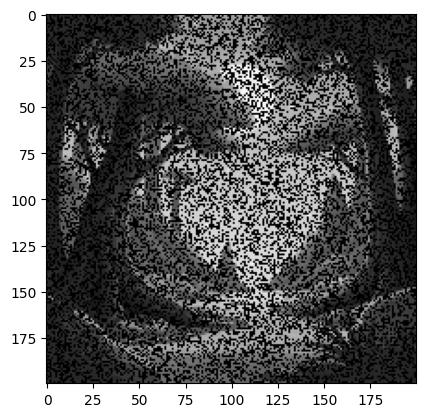

In [22]:
G3 = np.multiply(resized_image3, M1)
plt.imshow(G3, cmap = "gray")

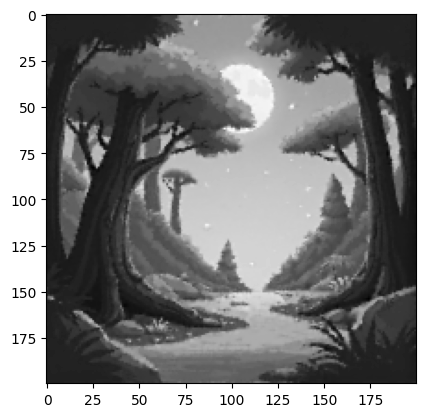

In [45]:
Y3 = np.zeros_like(G3)

a,b = CG(Y3, M1, G3, 0.006,0.000001)
plt.imshow(a, cmap = 'gray')

[9708213.500402287, 3143884.5318903998, 2939244.1853305437, 2936077.950448904, 2935929.658357725]


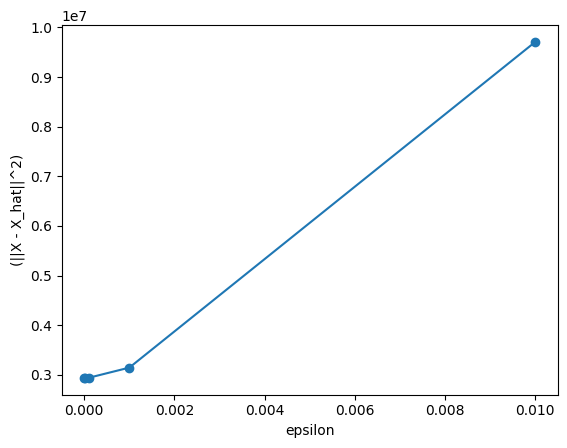

In [42]:
epsilon_v= [0.01, 0.001, 0.0001,0.00001, 0.000001]
X_hat_difference3 = []
X = resized_image3
for epsilon in epsilon_v:
   X_hat,_ = CG(Y3, M1, G3, 0.006, epsilon)
   X_hat_difference3.append(np.linalg.norm(X - X_hat)**2)
print(X_hat_difference3)

plt.plot(epsilon_v, X_hat_difference3, marker='o')
plt.xlabel('epsilon')
plt.ylabel('(||X - X_hat||^2)')
plt.show()

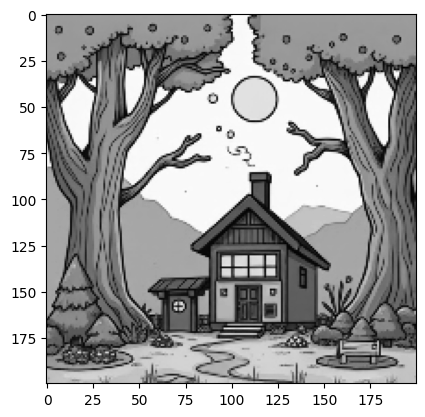

In [25]:
img4 = Image.open("4.jpg").convert('L')
im_array4 = np.array(img4)
resized_image4 = cv2.resize(im_array4, (new_width, new_height))
plt.imshow(resized_image4, cmap = "gray")

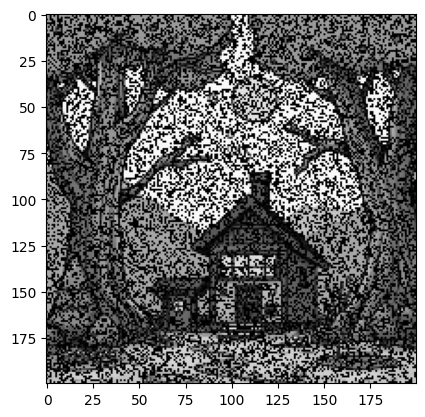

In [26]:
G4 = np.multiply(resized_image4, M1)
plt.imshow(G4, cmap = "gray")

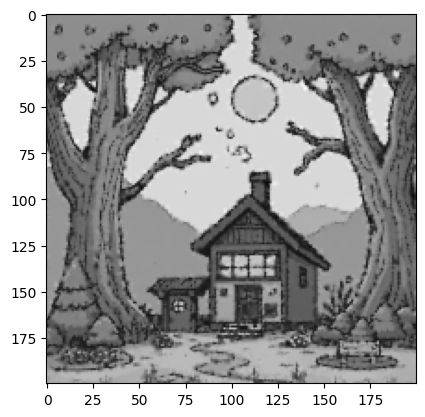

In [27]:
Y4 = np.zeros_like(G4)

a,b = CG(Y4, M1, G4, 0.006,0.0000000001)
plt.imshow(a, cmap = 'gray')

[30562826.18786071, 19707601.401105314, 19311769.353171844, 19301679.580876034, 19301494.68497513]


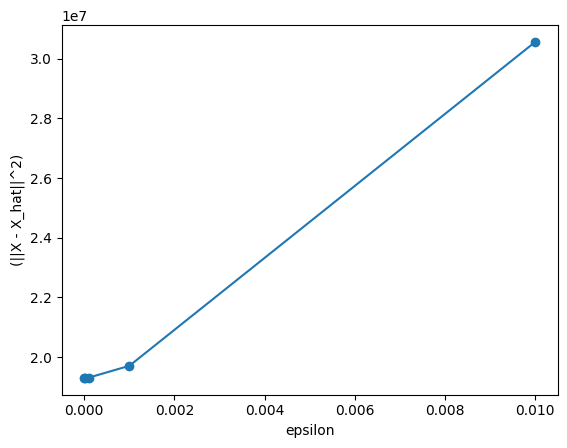

In [40]:
epsilon_v= [0.01, 0.001, 0.0001,0.00001, 0.000001]
X_hat_difference4 = []
X = resized_image4
for epsilon in epsilon_v:
   X_hat,_ = CG(Y4, M1, G4, 0.006, epsilon)
   X_hat_difference4.append(np.linalg.norm(X - X_hat)**2)
print(X_hat_difference4)

plt.plot(epsilon_v, X_hat_difference4, marker='o')
plt.xlabel('epsilon')
plt.ylabel('(||X - X_hat||^2)')
plt.show()

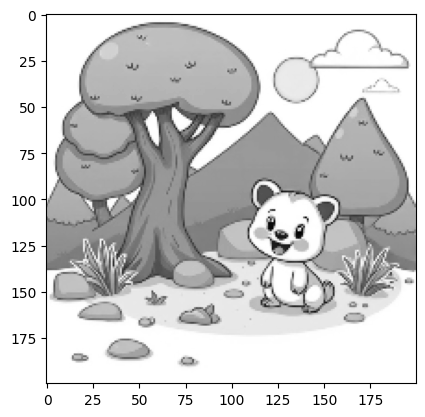

In [29]:
img5 = Image.open("5.jpg").convert('L')
im_array5 = np.array(img5)
resized_image5 = cv2.resize(im_array5, (new_width, new_height))
plt.imshow(resized_image5, cmap = "gray")

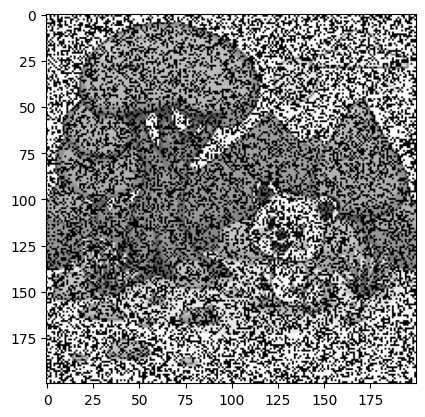

In [30]:
G5 = np.multiply(resized_image5, M1)
plt.imshow(G5, cmap = "gray")

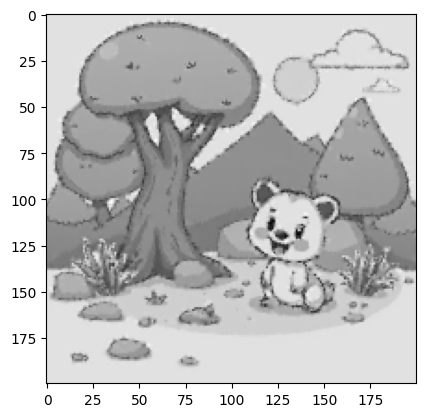

In [37]:
Y5 = np.zeros_like(G5)

a,b = CG(Y5, M1, G5, 0.0006,0.000000000001)
plt.imshow(a, cmap = 'gray')

[685990111.9133338, 36124279.64251849, 8529484.154351518, 7938502.612418462, 7929008.128128259]


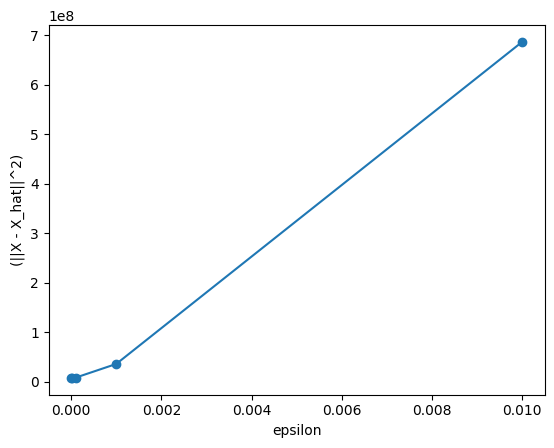

In [38]:
epsilon_v= [0.01, 0.001, 0.0001,0.00001, 0.000001]
X_hat_difference5 = []
X = resized_image5
for epsilon in epsilon_v:
   X_hat,_ = CG(Y5, M1, G5, 0.0006, epsilon)
   X_hat_difference5.append(np.linalg.norm(X - X_hat)**2)
print(X_hat_difference5)

plt.plot(epsilon_v, X_hat_difference5, marker='o')
plt.xlabel('epsilon')
plt.ylabel('(||X - X_hat||^2)')
plt.show()